<a href="https://colab.research.google.com/github/frizwankhan/Sentiment-Analysis-Major-Project/blob/main/SmartKnower_MajorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SmartKnower Internship Major project

In [4]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
from tensorflow import keras

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
df = pd.read_csv('/content/data.csv')
df.head()


,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [3]:
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

df['review'] = df['review'].apply(remove_punctuations)
df

,review,rating
0,It was nice produt I like its design a lot It...,5
1,awesome soundvery pretty to see this nd the so...,5
2,awesome sound quality pros 78 hrs of battery l...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5
...,...,...
9971,GoodREAD MORE,5
9972,Everything is amazimg but the built is very li...,5
9973,GoodREAD MORE,5
9974,Best headphone i have ever usedREAD MORE,5


In [ ]:

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
tokenizer=RegexpTokenizer(r'\w+')
df['review']=df['review'].apply(lambda x: tokenizer.tokenize(x.lower()))
df['review']

0       [it, was, nice, produt, i, like, its, design, ...
1       [awesome, soundvery, pretty, to, see, this, nd...
2       [awesome, sound, quality, pros, 78, hrs, of, b...
3       [i, think, it, is, such, a, good, product, not...
4       [awesome, bass, sound, quality, very, good, be...
                              ...                        
9971                                     [goodread, more]
9972    [everything, is, amazimg, but, the, built, is,...
9973                                     [goodread, more]
9974     [best, headphone, i, have, ever, usedread, more]
9975                                     [niceread, more]
Name: review, Length: 9976, dtype: object

In [ ]:
# def removestopwords(s):
#   words=[i for i in s if i not in stopwords.words('english')]
#   print(words)
#   return words

# df['review']=df['review'].apply(lambda x: removestopwords(x))
# df['review']

# #takes lots of time here so be patient here

In [ ]:
stopwords.words("english")

In [6]:
x = df.iloc[:,0].values
y = df.iloc[:,1].values
print(x)
print(y)

["It was nice produt. I like it's design a lot.  It's easy to carry. And.   Looked stylish.READ MORE"
 'awesome sound....very pretty to see this nd the sound quality was too good I wish to take this product loved this product 😍😍😍READ MORE'
 'awesome sound quality. pros 7-8 hrs of battery life (including 45 mins approx call time)Awesome sound output. Bass and treble are really very clear without equaliser. With equaliser, sound wary depends on the handset sound quality.Weightless to carry and in head tooMic is good, but in traffic it is not too good (3.25/5)3.5mm Option is really important to mention. Really expecting other leading brands to implement this.ConsVery tight in ears. adjusters are ok .. this ll be very tight...READ MORE'
 ... 'GoodREAD MORE' 'Best headphone i have ever used....READ MORE'
 'NiceREAD MORE']
[5 5 4 ... 5 5 5]


In [ ]:
len(x)

9976

In [ ]:
def dummy_fun(doc):
    return doc

vectorizer = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy_fun,
    preprocessor=dummy_fun,
    token_pattern=None)  

x = vectorizer.fit_transform(x)

In [ ]:
x = x.toarray()


AttributeError: ignored

In [ ]:

x.shape

(9976, 9932)

In [7]:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 0,stratify = y)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7482,)
(7482,)
(2494,)
(2494,)


In [ ]:
np.unique(y_train)

array([1, 2, 3, 4, 5])

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

In [12]:
text_model = Pipeline([('tfidf',TfidfVectorizer()),('model',SVC())]) 

In [13]:
text_model.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('model',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', d

In [14]:
y_pred = text_model.predict(x_test)
y_pred

array([5, 1, 4, ..., 5, 5, 5])

In [15]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_pred,y_test)*100

65.35685645549319

In [16]:
confusion_matrix(y_pred,y_test)

array([[ 106,   18,   21,    9,    2],
       [   1,    3,    0,    0,    0],
       [  15,   13,   40,   18,    9],
       [  15,   17,   53,  144,   83],
       [  36,   27,  107,  420, 1337]])

In [ ]:
# print(classification_report(y_pred,y_test))

In [ ]:
# text_model.predict(["Very bad product.  Within 5 days it's mic was out of work. I am very disappointed tobuythisproduct. I will never suggest to anyone for buying this product."])

In [ ]:
y_train_1 = keras.utils.to_categorical(y_train)
y_test_1 = keras.utils.to_categorical(y_test)

In [ ]:
y_train_1 = y_train_1[:, 1:]
y_test_1 = y_test_1[:, 1:]

In [ ]:
model = keras.models.Sequential([keras.layers.BatchNormalization(input_dim=x_train.shape[1]),
                                 keras.layers.Dense(100,kernel_initializer="he_normal"),
                                 keras.layers.PReLU(),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dropout(0.2),
                                 keras.layers.Dense(50,kernel_initializer="he_normal"),
                                 keras.layers.PReLU(),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dense(5, "softmax"),
                                 ])

model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)



In [ ]:

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_6 (Batch (None, 9932)              39728     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               993300    
_________________________________________________________________
p_re_lu_4 (PReLU)            (None, 100)               100       
_________________________________________________________________
batch_normalization_7 (Batch (None, 100)               400       
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 50)                5050      
_________________________________________________________________
p_re_lu_5 (PReLU)            (None, 50)               

In [ ]:
history = model.fit(x_train, y_train_1, validation_data=(x_test, y_test_1), epochs=50, callbacks=[early_stopping_cb])

Epoch 1/50
234/234 [==============================] - 5s 16ms/step - loss: 1.5810 - accuracy: 0.4414 - val_loss: 1.1119 - val_accuracy: 0.5766
Epoch 2/50
234/234 [==============================] - 4s 15ms/step - loss: 0.7229 - accuracy: 0.7451 - val_loss: 0.9523 - val_accuracy: 0.6391
Epoch 3/50
234/234 [==============================] - 4s 16ms/step - loss: 0.5497 - accuracy: 0.7997 - val_loss: 1.1886 - val_accuracy: 0.5770
Epoch 4/50
234/234 [==============================] - 4s 15ms/step - loss: 0.4609 - accuracy: 0.8338 - val_loss: 1.7279 - val_accuracy: 0.4936
Epoch 5/50
234/234 [==============================] - 4s 15ms/step - loss: 0.4128 - accuracy: 0.8541 - val_loss: 1.7976 - val_accuracy: 0.5036
Epoch 6/50
234/234 [==============================] - 4s 15ms/step - loss: 0.4003 - accuracy: 0.8522 - val_loss: 1.7952 - val_accuracy: 0.5144
Epoch 7/50
234/234 [==============================] - 4s 15ms/step - loss: 0.3790 - accuracy: 0.8601 - val_loss: 1.7074 - val_accuracy: 0.5934

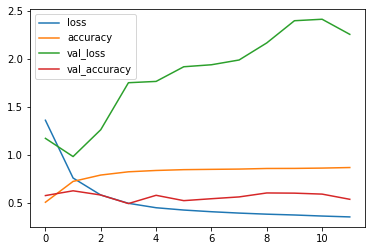

In [ ]:

import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()

In [ ]:
!pip install streamlit
!pip install pyngrok==4.1.1
from pyngrok import ngrok

In [ ]:
%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
from tensorflow import keras

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import string

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/data.csv')

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

df['review'] = df['review'].apply(remove_punctuations)

tokenizer=RegexpTokenizer(r'\w+')
df['review']=df['review'].apply(lambda x: tokenizer.tokenize(x.lower()))

def removestopwords(s):
  words=[i for i in s if i not in stopwords.words('english')]
  print(words)
  return words

x = df.iloc[:,0].values
y = df.iloc[:,1].values

def dummy_fun(doc):
    return doc

vectorizer = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy_fun,
    preprocessor=dummy_fun,
    token_pattern=None)  

x = vectorizer.fit_transform(x)
x = x.toarray()

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.05,random_state = 0,stratify = y)

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

# y = keras.utils.to_categorical(y)
# y = y[:, 1:]

y_train = y_train[:, 1:]
y_test = y_test[:, 1:]

model = keras.models.Sequential([keras.layers.BatchNormalization(input_dim=x_train.shape[1]),
                                 keras.layers.Dense(100,kernel_initializer="he_normal"),
                                 keras.layers.PReLU(),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dropout(0.2),
                                 keras.layers.Dense(50,kernel_initializer="he_normal"),
                                 keras.layers.PReLU(),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dense(5, "softmax"),
                                 ])

model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics="accuracy")

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(x_train, y_train,validation_data=(x_test,y_test),
                    epochs=50, callbacks=[early_stopping_cb])

st.title('sentiment analysis')
select = st.text_input('Enter your message')

select = remove_punctuations(select)
select = tokenizer.tokenize(select.lower())

select = vectorizer.transform([select]).toarray()
output = np.argmax(model.predict(select), axis=-1)

st.title(output[0])


Overwriting app.py


In [ ]:
!nohup streamlit run app.py &
url = ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


'http://50f941be4114.ngrok.io'

In [ ]:
df = pd.read_csv('/content/data.csv')
 
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
 
df['review'] = df['review'].apply(remove_punctuations)
 
tokenizer=RegexpTokenizer(r'\w+')
df['review']=df['review'].apply(lambda x: tokenizer.tokenize(x.lower()))
 
def removestopwords(s):
  words=[i for i in s if i not in stopwords.words('english')]
  print(words)
  return words
 
x = df.iloc[:,0].values
y = df.iloc[:,1].values
 
def dummy_fun(doc):
    return doc
 
vectorizer = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy_fun,
    preprocessor=dummy_fun,
    token_pattern=None)  
 
x = vectorizer.fit_transform(x)
x = x.toarray()
 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.05,random_state = 0,stratify = y)
 
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
 
# y = keras.utils.to_categorical(y)
# y = y[:, 1:]
 
y_train = y_train[:, 1:]
y_test = y_test[:, 1:]
 
model = keras.models.Sequential([keras.layers.BatchNormalization(input_dim=x_train.shape[1]),
                                 keras.layers.Dense(100,kernel_initializer="he_normal"),
                                 keras.layers.PReLU(),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dropout(0.2),
                                 keras.layers.Dense(50,kernel_initializer="he_normal"),
                                 keras.layers.PReLU(),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dense(5, "softmax"),
                                 ])
 
model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics="accuriacy")
 
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
 
history = model.fit(x_train, y_train,validation_data=(x_test,y_test),
                    epochs=50, callbacks=[early_stopping_cb])

Epoch 1/50
297/297 [==============================] - 6s 16ms/step - loss: 1.4970 - accuracy: 0.4615 - val_loss: 1.0667 - val_accuracy: 0.5792
Epoch 2/50
297/297 [==============================] - 4s 15ms/step - loss: 0.7086 - accuracy: 0.7405 - val_loss: 1.0348 - val_accuracy: 0.6052
Epoch 3/50
297/297 [==============================] - 4s 15ms/step - loss: 0.5361 - accuracy: 0.8071 - val_loss: 1.4020 - val_accuracy: 0.6132
Epoch 4/50
297/297 [==============================] - 4s 15ms/step - loss: 0.4617 - accuracy: 0.8325 - val_loss: 2.2681 - val_accuracy: 0.4028
Epoch 5/50
297/297 [==============================] - 4s 15ms/step - loss: 0.4473 - accuracy: 0.8386 - val_loss: 1.6339 - val_accuracy: 0.5471
Epoch 6/50
297/297 [==============================] - 4s 15ms/step - loss: 0.3960 - accuracy: 0.8523 - val_loss: 2.1476 - val_accuracy: 0.4228
Epoch 7/50
297/297 [==============================] - 4s 15ms/step - loss: 0.3875 - accuracy: 0.8555 - val_loss: 1.7765 - val_accuracy: 0.5491